In [1]:
# !pip install Pillow

# 선형대수, 데이터 전처리
import numpy as np 
import pandas as pd 


import os
from PIL import Image
from tqdm import tqdm


# 데이터의 입력 크기를 전역변수로 설정함
INPUT_SHAPE = (128, 128, 3)  

### __이미지 사이즈 변경__

#### 변경이유 : 계산 소요시간, 메모리 제한을 피하기위해 이미지 사이즈 변경 후 확인

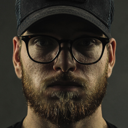

In [2]:
real_face_dir = os.path.join('/kaggle', 'input', 'real-and-fake-face-detection', 'real_and_fake_face', 'training_real')
real_face_image_temp = Image.open(os.path.join(real_face_dir, os.listdir(real_face_dir)[0])).resize((128, 128))
real_face_image_temp

### __데이터 전처리__

#### 데이터 전처리 단계에서는 향후 계산 비용을 고려하여 Normalization만 수행하였음


아래 구분에 따른 이미지 데이터 전처리 방법

(Normalization) 데이터 처리는 RGB값 (Maximum: 255, Minimum: 0)을 사용하여 __MinMaxScale__

(Grayscale conversion) 컬러 그림을 흑백으로 변환 - 채도에 대한 정보가 필요없을 경우 계산의 복잡도를 줄여주지만 현 데이터에서는 적용하지 않음

(Augmentation) 이후 데이터 증폭을 위해 __keras의 ImageDataGenerator__를 사용할 수 있음 (가능한 방법 아래)


    - Shifting : 이미지 픽셀을 수평 또는 수직 방향으로 이동 시킴
    
    - Fliping : 이미지를 수평 또는 수직 축에대햐여 뒤집음
    
    - Rotation : 이미지를 일정한 각도 범위내에서 회전 시킴
    
    - Changing brightness : 이미지의 밝기를 변환시킴
    
    - 그 외 Cropping, Scaling
    
참고 : https://www.section.io/engineering-education/image-preprocessing-in-python/

In [3]:
# 실제, 가짜 얼굴 사진 파일 경로 각각 정의
real_face_dir = os.path.join('/kaggle', 'input', 'real-and-fake-face-detection', 'real_and_fake_face', 'training_real')
fake_face_dir = os.path.join('/kaggle', 'input', 'real-and-fake-face-detection', 'real_and_fake_face', 'training_fake')

# 더미 변수가 들어있는 데이터와 레이블 정의
X_data = np.empty((1,) + INPUT_SHAPE, float)
y_labl = np.empty((1, 1), int)

# 각 사진 파일 Load & resize 이후 데이터와 레이블에 각각 추가 (실제 얼굴 사진)
for real_face in tqdm(os.listdir(real_face_dir)):
    image_normed = np.array([np.array(Image.open(os.path.join(real_face_dir, real_face)).resize((128, 128)))]) / 255
    X_data = np.append(X_data, image_normed, axis=0)
    y_labl = np.append(y_labl, np.array([[0]]), axis=0)

# 더미 데이터 삭제
X_data = np.delete(X_data, 0, axis=0)
y_labl = np.delete(y_labl, 0, axis=0)

# 각 사진 파일 Load & resize 이후 데이터와 레이블에 각각 추가 (가짜 얼굴 사진)
for fake_face in tqdm(os.listdir(fake_face_dir)):
    image_normed = np.array([np.array(Image.open(os.path.join(fake_face_dir, fake_face)).resize((128, 128)))]) / 255
    X_data = np.append(X_data, image_normed, axis=0)
    y_labl = np.append(y_labl, np.array([[1]]), axis=0)

100%|██████████| 960/960 [04:12<00:00,  3.80it/s]


In [4]:
print(X_data.shape, y_labl.shape)

(2041, 128, 128, 3) (2041, 1)
